In [12]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import math
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy import stats as scp
%config InlineBackend.figure_format='retina'

### Exercise 01

The main goal of the exercise is to test the pseudo-random number generator. To achieve this goal a few integrals are evaluated both through the standard mean value method and also through the sampling of a probability distribution via the cumulative inversion. The standard procedure for error analysis is the method of data blocking. 


### Exercise 01.1: Validity of pseudo random number generator

1. An estimation of $\langle r \rangle$ and its uncertainty are givens a function of the number of blocks $N$. The following picture represents the successive values with a large number of *throws* $M$ (here $M = 10^6$) divided in $N$ blocks (here $N = 100$).

$\langle r \rangle = \int_0^1rdr = 1$

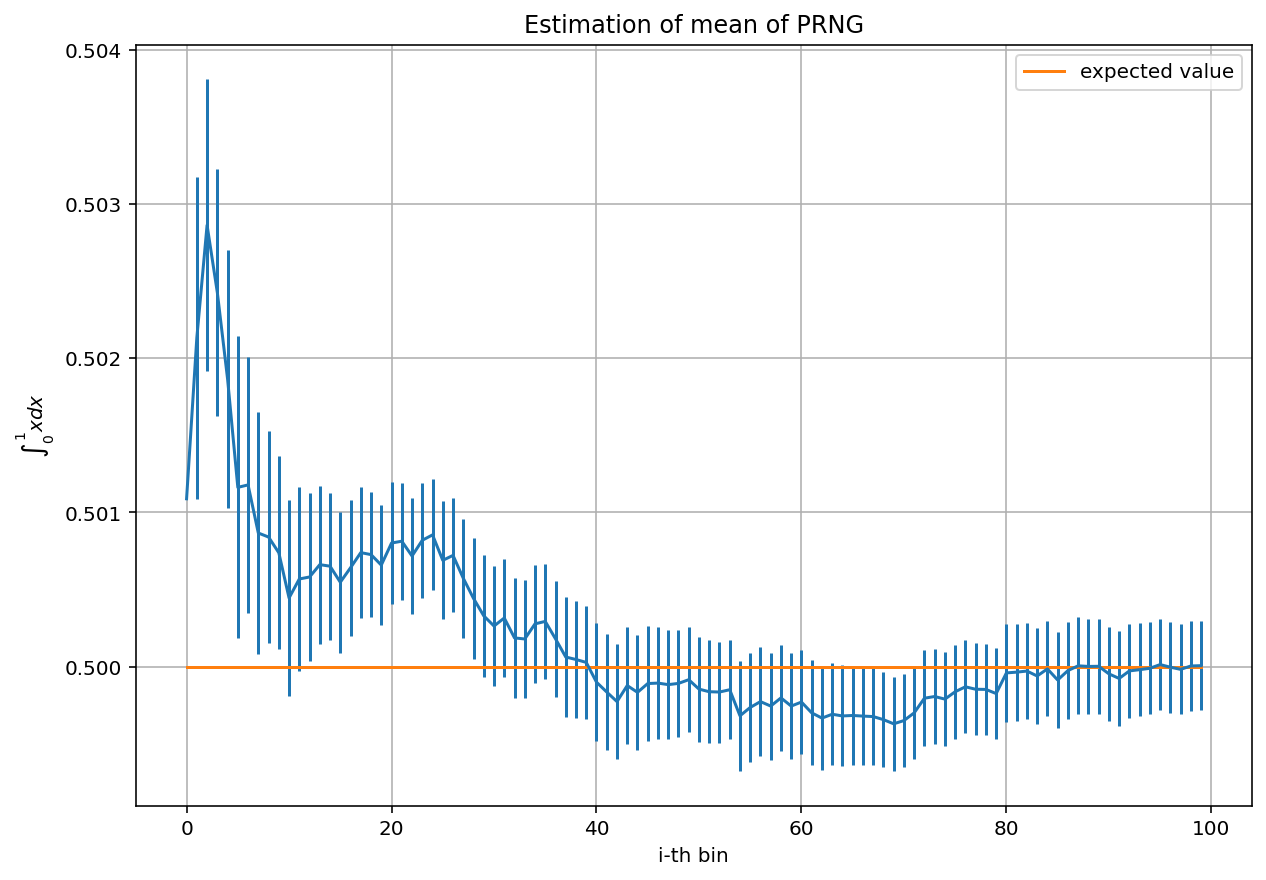

In [13]:
x, f, error, exp = np.loadtxt("random_test.txt", usecols=(0,1,2,3), unpack='true')
fig, ax = plt.subplots(figsize = (10,7))
ax.errorbar(x,f,yerr=error)
ax.plot(x,exp,label="expected value")
ax.set_xlabel('i-th bin')
ax.set_ylabel('$\int_{0}^{1} x dx$')
ax.grid(True)
ax.set_title("Estimation of mean of PRNG")
ax.legend()
plt.show()





It can be clearly seen that the result is consistent with the expected value and the error computed


2.  An estimation of $\sigma^2$ and its uncertainty are given as a function of the number of blocks $N$. The following picture represents the successive values with a large number of *throws* $M$ (here $M = 10^6$) divided in $N$ blocks (here $N = 100$).

$\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$.

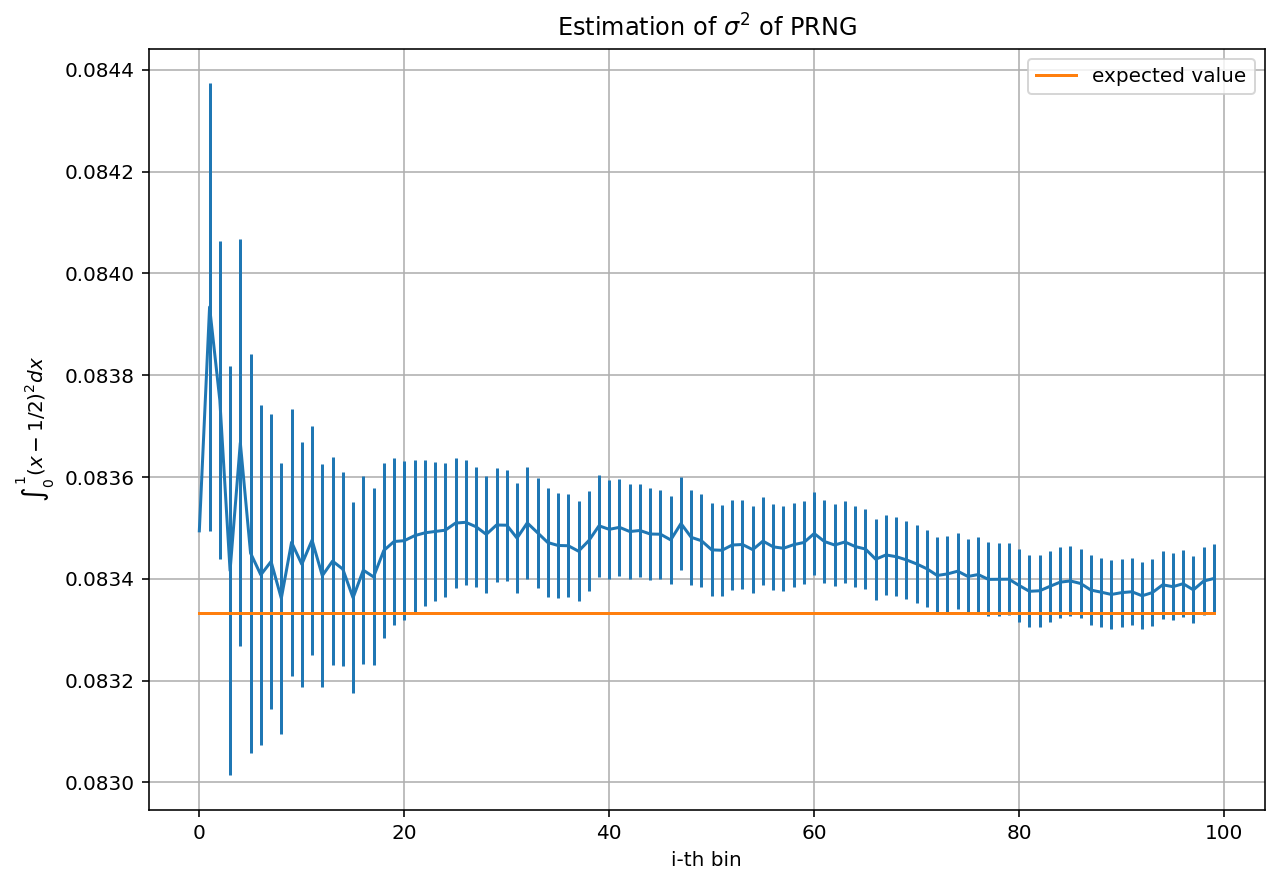

In [14]:
x, f, error, exp = np.loadtxt("sigma.txt", usecols=(0,1,2,3), unpack='true')
fig,ax = plt.subplots(figsize=(10,7))
ax.errorbar(x,f,yerr=error)
ax.plot(x,exp,label="expected value")
ax.set_xlabel('i-th bin')
ax.set_ylabel('$\int_{0}^{1} (x-1/2)^2 dx$')
ax.grid(True)
ax.set_title("Estimation of $\sigma^2$ of PRNG")
ax.legend()
plt.show()


It can be clearly seen that the result is consistent with the expected value and the error computed



3. $\chi ^2$ statistic. In the following exercise the interval $[0,1]$ is divided into $M$ subintervals of equal length. Since the random numbers are expected to follow a costant distribution, the expected number of events in each subinterval after $n$ throws is $np = n/M$. Here $M = 100$ and $n = 10^4$. Thus $\chi^2$ is actually calculated $100$ times for differents "bins" of pseudo random numbers and then shown in the following picture

$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$

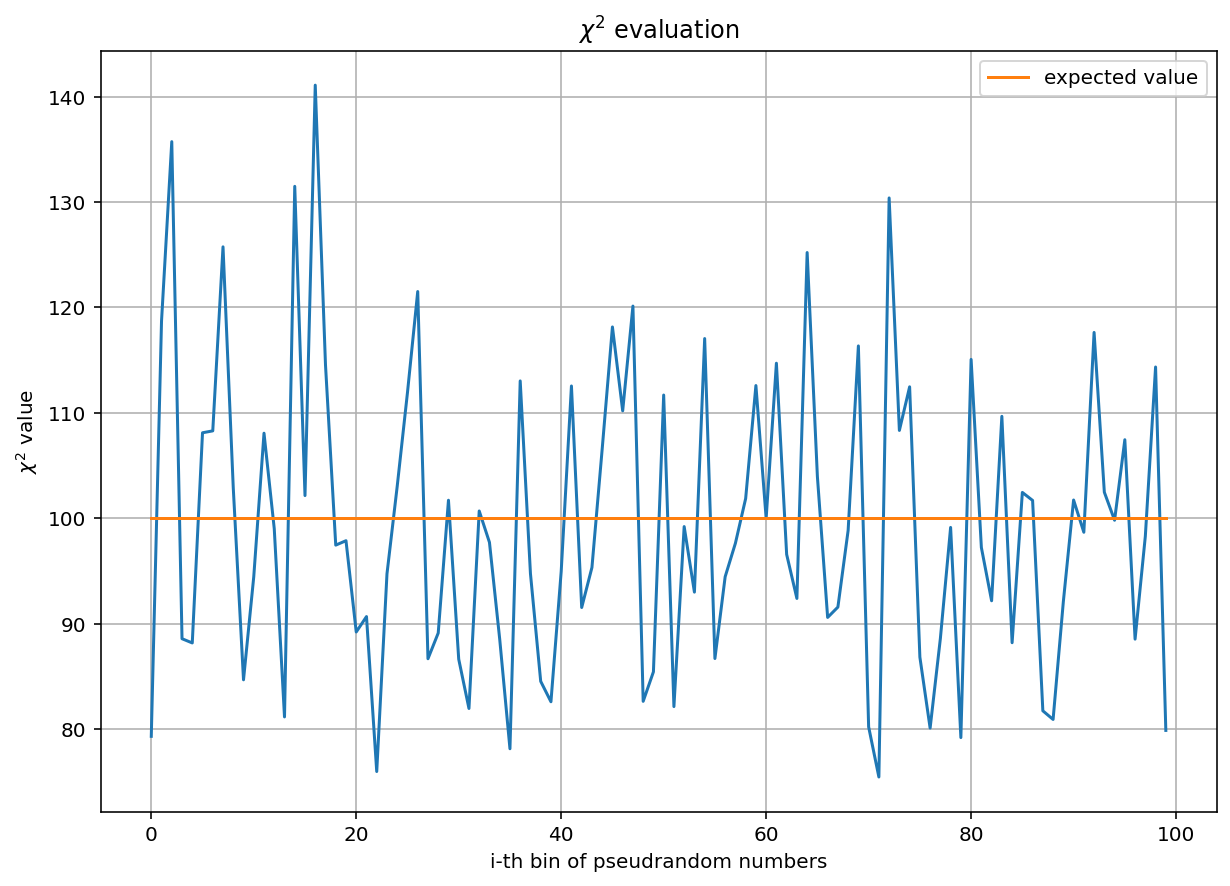

In [15]:
X, exp  = np.loadtxt("chi.txt", usecols=(0,1), unpack='true')
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(X)
ax.plot(exp, label="expected value")
ax.set_xlabel("i-th bin of pseudrandom numbers")
ax.set_ylabel("$\chi^2$ value")
ax.set_title("$\chi^2$ evaluation")
ax.grid(True)
ax.legend()
plt.show()

### Exercise 01.2: Check of central limit theorem

1. <font color="red">Two probability distributions</font> are added by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$.
2. <font color="red"> 3 pictures</font> with the histograms are obtained after filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice, an *exponential* dice ($\lambda=1$) and a *Lorentzian* dice ($\mu=0$ and $\Gamma=1$).

1. Standard PDF: $p(x) = 1 \, x \in [0,1]$

2. Exponential PDF: $p(x) = \lambda e^{-\lambda x}$;    $F(x) = 1-e^{-\lambda x}$;   $F^{-1}(y)=\frac{-log(1-y)}{\lambda}$

3. Cauchy distribution $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$;     $F(x) = \frac{1}{\pi}\arctan(\frac{x-\mu}{\Gamma}) +\frac{1}{2}$;     $F^{-1}(y)= \Gamma \tan[(y-\frac{1}{2})\pi]+\mu$

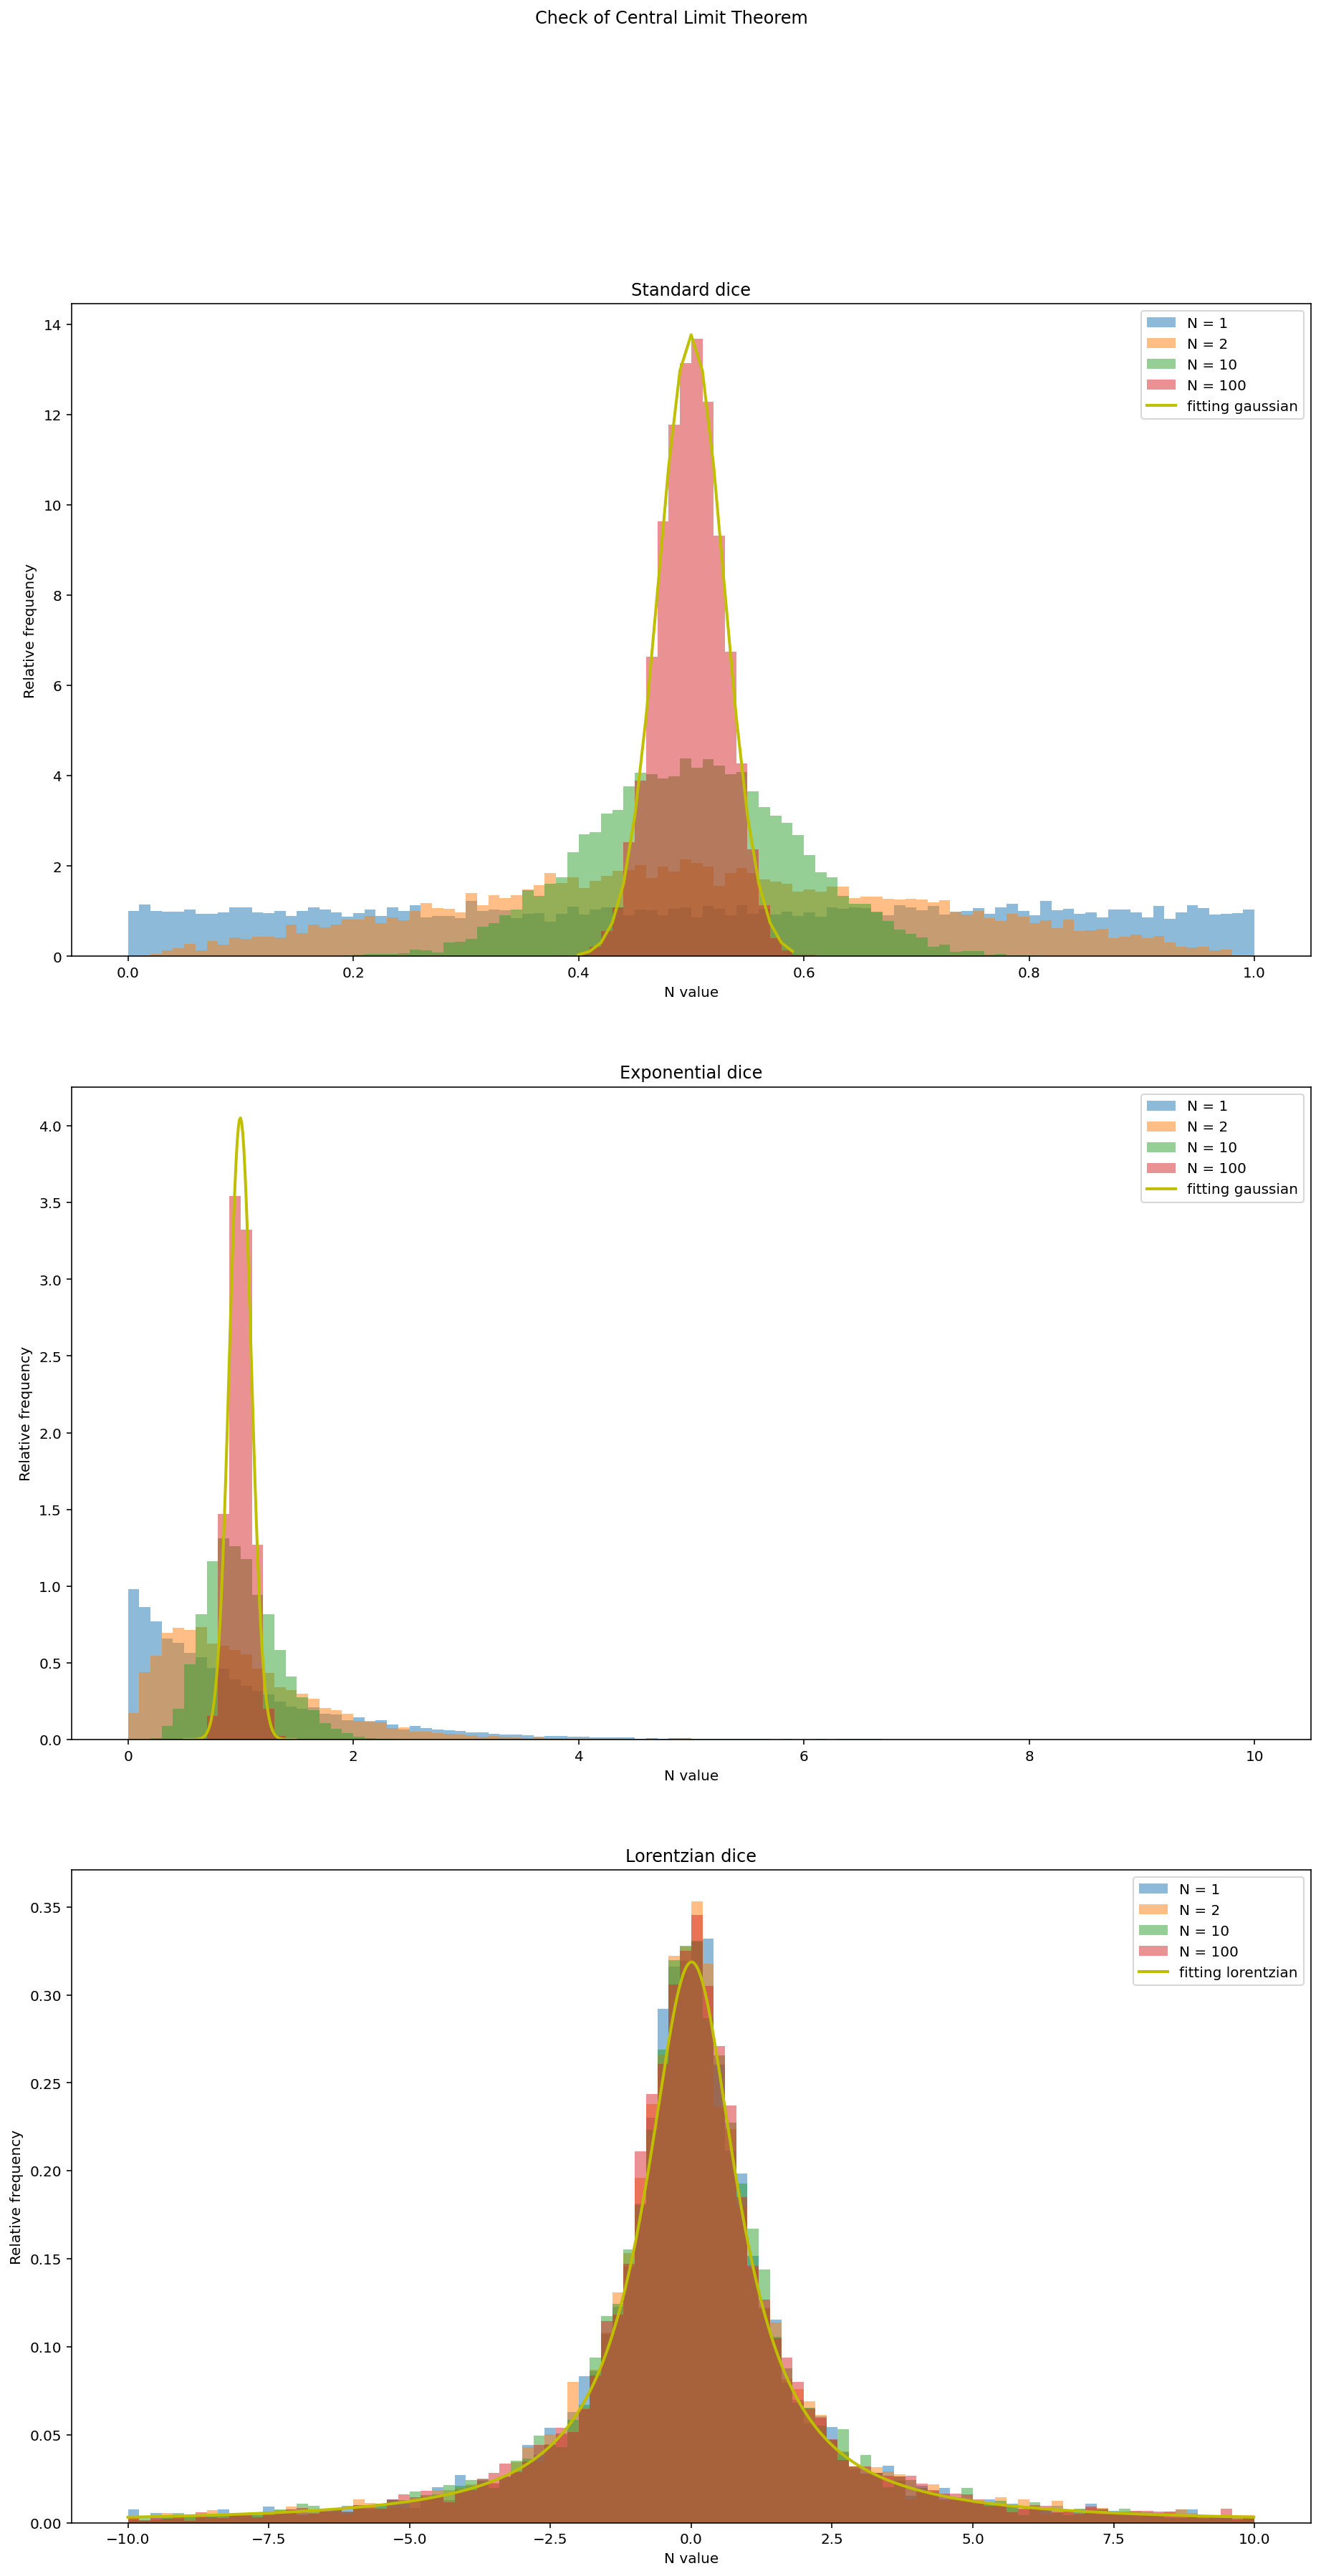

In [16]:
X = np.loadtxt("CLT.txt")
fig, axs = plt.subplots(3, 1)
fig.set_size_inches(15.5, 28.5)
fig.suptitle("Check of Central Limit Theorem")
L = [0,1,2,3]
N = [1,2,10,100]
labels = ["N = 1","N = 2","N = 10","N = 100"]
for i in L:
    axs[0].hist(X[i*10000:10000*(i+1),0], range = [0,1], bins = 100, alpha=0.5, label = labels[i], density = True)
    if (i == 3):
        mu, sigma = scp.norm.fit(X[i*10000:10000*(i+1),0])
        x = np.arange(0.4,0.6,0.01)
        y = scp.distributions.norm.pdf(x,mu,sigma)
        axs[0].plot(x, y, color = 'y', linewidth=2, label = "fitting gaussian")
        
    axs[1].hist(X[i*10000:10000*(i+1),1], range = [0,10], bins = 100, alpha=0.5, label = labels[i], density = True)
    if (i == 3):
        mu, sigma = scp.norm.fit(X[i*10000:10000*(i+1),1])
        x = np.arange(0.5,1.5,0.01)
        y = scp.distributions.norm.pdf(x,mu,sigma)
        axs[1].plot(x, y, color = 'y', linewidth=2, label = "fitting gaussian")
    axs[2].hist(X[i*10000:10000*(i+1),2], range = [-10,10], bins = 100, alpha=0.5, label = labels[i], density = True)
    if (i == 3):
        loc, scale = scp.cauchy.fit(X[i*10000:10000*(i+1),2])
        x = np.arange(-10,10,0.01)
        y = scp.distributions.cauchy.pdf(x,loc,scale)
        axs[2].plot(x, y, color = 'y', linewidth=2, label = "fitting lorentzian")


L_1 = [0,1,2]

for i in L_1:
    axs[i].set_xlabel("N value")
    axs[i].set_ylabel("Relative frequency")
axs[0].title.set_text("Standard dice")
axs[1].title.set_text("Exponential dice")
axs[2].title.set_text("Lorentzian dice")
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.show()

### Exercise 01.3
- Buffon’s experiment:  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but not $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This can be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, an estimate of $\pi$ can be obtained from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">A picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) is drawn with a large number of *throws* $M$ as a function of the number of blocks, $N$</font>

From a computational point of view the experiment has been "performed" first sampling the position of the centre of mass of the needle and then the angle of inclination.Being $d$ the distance between two lines, $2l$ the length of the needle and $x$ the COM coordinate, the "hit" is fulfilled if two conditions are met: 

1. The centre of mass must be close enough to a "line" of the ruled plane in order for the needle to be able to intersect it: $x \geq d-l \lor x < l$ 
2. the inclination angle $\theta$ (depending on the position of the centre of mass) must make the intersection possible: $\theta < arcos(\frac{d-x}{l})$ when $x \geq d-l$; $\theta < arcos(\frac{x}{l})$ when $x < l$

The main problem to be solved is the sampling of theta. In order toa sample a unifrom number from $0$ to $\pi$ the knwledge of the value of $\pi$ is needed. Th problem is solved sampling uniformly 2 numbers $a,b \in [0,1)\, s.t. a^2 + b^2 < 1$. $\theta$ is then defined as $\arctan(\frac{b}{a})$ 


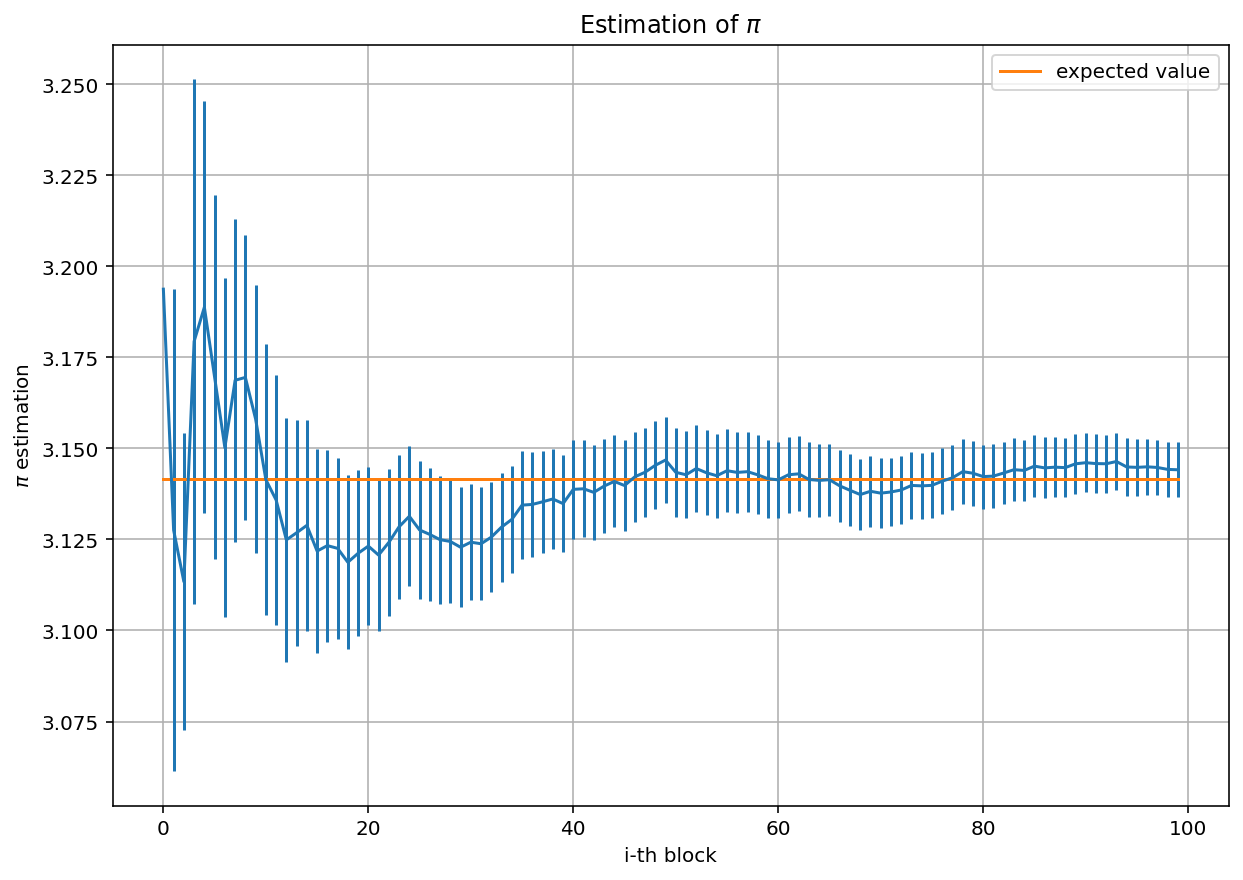

In [17]:
x, f, error, exp = np.loadtxt("buffon.txt", usecols=(0,1,2,3), unpack='true')
fig,ax = plt.subplots(figsize = (10,7))
ax.errorbar(x,f,yerr=error)
ax.plot(x,exp,label="expected value")
ax.set_xlabel('i-th block')
ax.set_ylabel('$\pi$ estimation')
ax.grid(True)
ax.set_title("Estimation of $\pi$")
ax.legend()
plt.show()